In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [49]:
df=pd.read_csv('dinos.csv')
df.head()
gender=pd.get_dummies(df['Gender'],drop_first=True).astype(int)

species=pd.get_dummies(df['Species'],drop_first=True).astype(int)





In [50]:
df['Gender']=gender 


df['iguanadon']=species['Iguanadon']
df['Plateosaurus']=species['Plateosaurus']
df['Pterodactyl']=species['Pterodactyl']
df['Raptor']=species['Raptor']
df['Stegosaurus']=species['Stegosaurus']
df['Vulcanodon']=species['Vulcanodon']
df=df.drop('Species',axis=1)
df.head()



,Weight,Length,Age,TailLength,Height,Width,Gender,Completeness,iguanadon,Plateosaurus,Pterodactyl,Raptor,Stegosaurus,Vulcanodon
0,1650.0,59.0,63.4,68.0,10.8120,7.480,1,0.545,1,0,0,0,0,0
1,145.0,22.0,24.0,25.5,6.3750,3.825,1,0.531,0,0,1,0,0,0
2,820.0,37.1,40.0,42.5,11.1350,6.630,0,0.661,0,0,1,0,0,0
3,242.0,23.2,25.4,30.0,11.5200,4.020,0,0.793,0,0,0,0,0,0
4,650.0,36.5,39.0,41.4,11.1366,6.003,1,0.931,0,0,1,0,0,0


In [51]:
df['length^2']=df['Length']**2
df['Height^2']=df['Height']**2
df['Age^2']=df['Age']**2
df['TL^2']=df['TailLength']**2
df['Width^2']=df['Width']**2

In [52]:
df.head()

,Weight,Length,Age,TailLength,Height,Width,Gender,Completeness,iguanadon,Plateosaurus,Pterodactyl,Raptor,Stegosaurus,Vulcanodon,length^2,Height^2,Age^2,TL^2,Width^2
0,1650.0,59.0,63.4,68.0,10.8120,7.480,1,0.545,1,0,0,0,0,0,3481.00,116.899344,4019.56,4624.00,55.950400
1,145.0,22.0,24.0,25.5,6.3750,3.825,1,0.531,0,0,1,0,0,0,484.00,40.640625,576.00,650.25,14.630625
2,820.0,37.1,40.0,42.5,11.1350,6.630,0,0.661,0,0,1,0,0,0,1376.41,123.988225,1600.00,1806.25,43.956900
3,242.0,23.2,25.4,30.0,11.5200,4.020,0,0.793,0,0,0,0,0,0,538.24,132.710400,645.16,900.00,16.160400
4,650.0,36.5,39.0,41.4,11.1366,6.003,1,0.931,0,0,1,0,0,0,1332.25,124.023860,1521.00,1713.96,36.036009


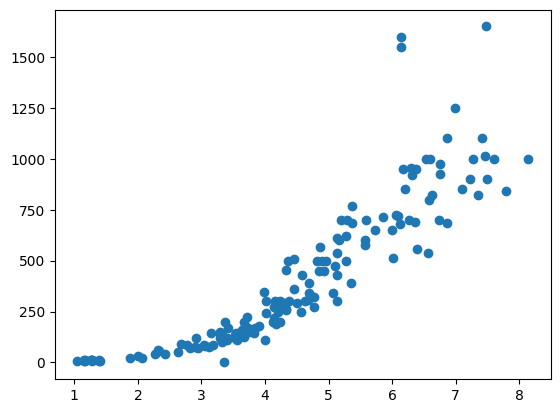

In [53]:
plt.scatter(df['Width'],df['Weight'])

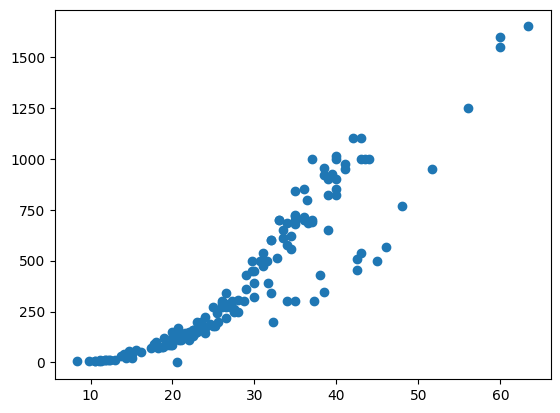

In [54]:
plt.scatter(df['Age'],df['Weight'])

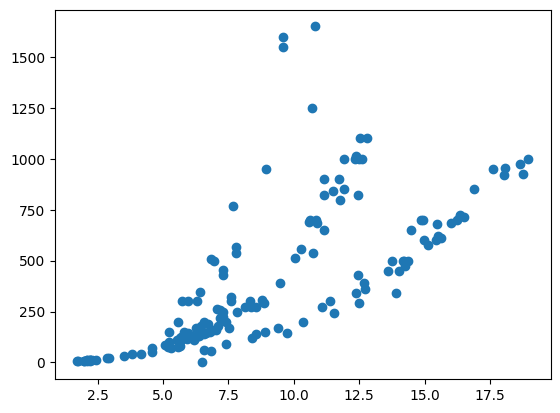

In [55]:
plt.scatter(df['Height'],df['Weight'])

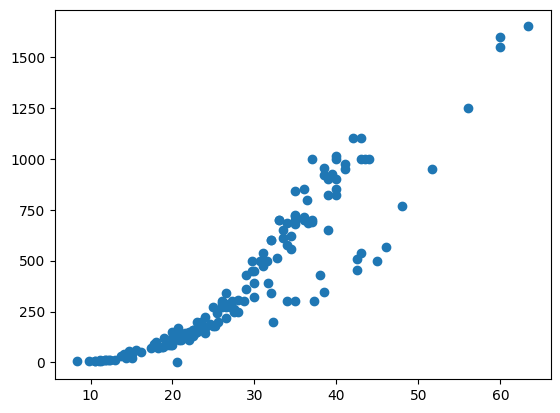

In [56]:
plt.scatter(df['Age'],df['Weight'])

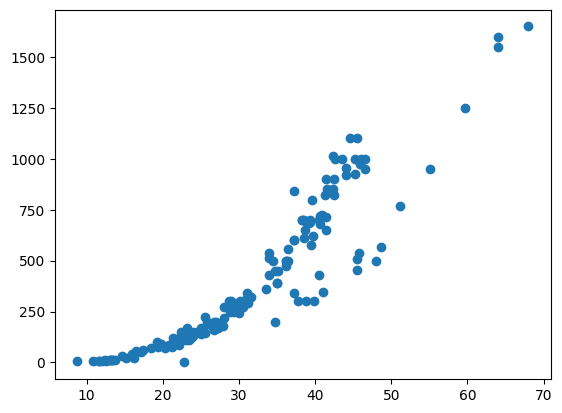

In [57]:
plt.scatter(df['TailLength'],df['Weight'])

In [58]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
 
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()



In [59]:
print(x_test)

     Length   Age  TailLength   Height   Width  Gender  Completeness  \
7      17.5  18.8        21.2   5.5756  2.9044       0         0.605   
40     22.0  23.4        26.7   6.9153  3.6312       0         0.061   
95     25.0  26.5        28.0   7.1680  4.1440       1         0.330   
45     20.5  22.0        24.3   6.6339  3.5478       1         0.840   
110    21.1  22.5        25.0   6.4000  3.8000       1         0.477   
120    20.5  22.5        24.0   5.8560  3.6240       1         0.204   
59     27.8  30.0        31.6   7.6156  4.7716       0         0.326   
131    32.7  36.0        41.5  16.5170  5.8515       1         0.996   
33     19.4  21.0        23.7   6.1146  3.2943       1         0.889   
83     31.9  35.0        40.5  16.2405  5.5890       0         0.255   
128    27.6  30.0        35.0  12.6700  4.6900       1         0.581   
134    34.6  37.0        39.3  10.5717  6.3666       1         0.307   
60     19.0  20.7        23.2   9.3960  3.4104       1         0

In [60]:
def zscore_normalise_features(x):
    mu=np.mean(x,axis=0)
    sd=np.std(x,axis=0)
    x_norm=(x-mu)/sd
    return mu,sd,x_norm
mu,sd,x_norm_train=zscore_normalise_features(x_train)


In [61]:
def compute_cost(x,y,w,b):
    m,n=np.shape(x)
    cost=0
    for i in range (m):
        cost=cost+ (np.dot(x[i],w)+b-y[i])**2
    cost/=(2*m)
    return cost

In [62]:
def compute_gradient(x,y,w,b):
    m,n=np.shape(x)
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        err=(np.dot(w,x[i])+b-y[i])
        dj_db=dj_db+err
        for j in range (n):
            dj_dw[j]=dj_dw[j]+err*x[i,j]
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db
m,n=np.shape(x_train)
w=np.zeros((n,))
b=0
compute_gradient(x_norm_train,y_train,w,b)

(array([-338.13928373, -338.90050781, -340.18419403, -266.08303232,
        -322.42992604,  -32.65203895,  -12.27382897, -109.47107763,
          60.76671464,    5.66376958,   76.11443569,  138.55241489,
         -39.11311323, -339.0138906 , -247.85005383, -341.25093477,
        -345.61727226, -331.43336285]),
 -391.70540540540543)

In [63]:
def gradient_descent(x,y,w,b,alpha,num_iters):
    j_history=[]
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        j_history.append(compute_cost(x,y,w,b))
    return w,b,j_history  
b=0
num_iters=200
w_fin,b_fin,j_hist=gradient_descent(x_norm_train,y_train,w,b,0.02,num_iters)
print(w_fin)
print(b_fin)
print(j_hist)

[ 29.3883743   28.98894977  26.98851443  17.7138873   28.06354747
  -5.8925583   -2.16560457 -47.40537139  10.41141389   7.44423878
  -8.18680254  53.5211348    9.65034321  70.44737414  34.76830007
  70.84340808  68.52868027  63.73523598]
384.8161116499627
[122280.49287487043, 105884.87813203632, 93898.43196696327, 84937.84793973579, 78063.07602257784, 72634.91219611882, 68218.35710330908, 64517.0335010239, 61328.68017967016, 58514.94837654762, 55980.90388652916, 53661.11549825829, 51510.21295888488, 49496.47801391839, 47597.493747438464, 45797.190741398656, 44083.84117264568, 42448.69623586548, 40885.06018156903, 39387.66069351932, 37952.220412835326, 36575.16500914967, 35253.423959678636, 33984.294285138836, 32765.34705164557, 31594.362935326943, 30469.287548925597, 29388.200217283018, 28349.29191605973, 27350.84946394278, 26391.243992332576, 25468.922350200573, 24582.400531891468, 23730.258507556056, 22911.136034042953, 22123.72915859061, 21366.787218989033, 20639.110205903926, 1993

(200,)
(200,)


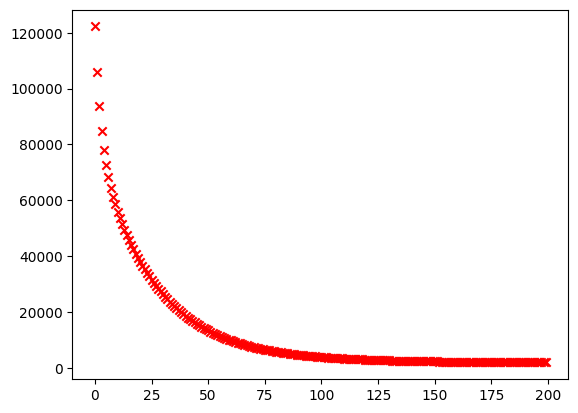

In [64]:
iters=np.arange(num_iters)
print(np.shape(iters))
j_hist=np.array(j_hist)
print(np.shape(j_hist))
plt.scatter(iters,j_hist,color='red',marker='x')

In [65]:
print(y_test)

7        78.0
40      161.0
95      218.0
45      145.0
110     160.0
120     130.0
59      320.0
131     714.0
33      120.0
83      700.0
128     390.0
134     690.0
60      170.0
126    1015.0
62      700.0
37      120.0
44      145.0
142     150.0
85      265.0
26      950.0
61      500.0
54      540.0
86      145.0
144     620.0
63      140.0
8       270.0
24      100.0
56      725.0
119     340.0
148     120.0
19      430.0
90      975.0
143     600.0
130     125.0
16      650.0
96      500.0
107     140.0
22     1000.0
113       5.9
89      700.0
109       9.7
74      115.0
97       40.0
27     1000.0
157     273.0
100     500.0
51     1250.0
101     700.0
Name: Weight, dtype: float64


In [66]:
m,n=np.shape(x_test)
y_pred=np.zeros((m,))
#x_test_norm=zscore_normalise_features(x_test)[2]
x_test_norm=(x_test-mu)/sd
x_test_norm=x_test_norm.to_numpy()
for i in range(m):
    y_pred[i]+=(np.dot(x_test_norm[i],w_fin)+b_fin)
print(y_pred)

[   3.0901098   149.51304741  261.01972447   87.81474824  112.58707255
  132.5513666   389.65895168  732.77348323   52.64485205  702.42985659
  444.56340072  705.42707673  159.80705629  894.87145227  700.77699936
   58.30610676  181.13959857  133.10870552  284.13211472 1006.63816915
  666.78250312  608.13315256  136.6652064   640.84345296  107.32097683
  312.89228665   35.92254778  722.29013062  547.72465051  109.70356191
  442.82533807  989.91329388  573.06752757  103.70160796  628.55361017
  509.05753514  157.78191471  870.92237233 -204.54669882  596.29798495
  -26.69513927   95.19814957 -111.11360556 1040.89086732  321.58415871
  504.40889447 1259.92031224  702.93665661]


In [67]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 95.0%
